In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk

In [226]:
df = pd.read_csv("HASIL PREDIKSI FIX/hasil_prediksi_anteraja_fix.csv")

df

,time,clean_tweets,sentimen
0,2022-01-03 12:32:17+00:00,abang abang anteraja balas mau ambil besok seb...,netral
1,2022-05-17 10:39:51+00:00,abang abang anteraja benar sudah hubung pagi b...,netral
2,2022-04-06 03:14:25+00:00,abang abang anteraja cepat ambil mau tidur ant...,netral
3,2022-03-11 15:00:24+00:00,abang abang anteraja hilang melulu ih pagi pag...,negatif
4,2022-02-04 10:16:39+00:00,abang abang anteraja hubung jangan baca doang ...,negatif
...,...,...,...
86272,2022-04-27 02:06:06+00:00,zaman ekspedisi jawa lewat tol banyak usaha ek...,positif
86273,2022-05-18 11:00:02+00:00,zaman pakai parfum buat buat wangi bisa bau ba...,netral
86274,2022-08-01 15:10:07+00:00,zaman sudah digital era industri investigasi k...,negatif
86275,2022-01-20 08:14:04+00:00,zaman suka,negatif


In [227]:
# membuat dataframe baru hanya dengan sentimen negatif
df_negatif = df[df['sentimen'] == 'negatif']

df_negatif.head()

,time,clean_tweets,sentimen
3,2022-03-11 15:00:24+00:00,abang abang anteraja hilang melulu ih pagi pag...,negatif
4,2022-02-04 10:16:39+00:00,abang abang anteraja hubung jangan baca doang ...,negatif
6,2022-02-26 10:27:27+00:00,abang abang anteraja lama sudah ambil barang,negatif
7,2022-07-18 03:48:44+00:00,abang abang anteraja nya sudah datang ambil ny...,negatif
8,2022-08-29 11:36:18+00:00,abang abang anteraja repot sekali sih angkat t...,negatif


In [228]:
# membuat dataframe baru hanya dengan sentimen positif
df_positif = df[df['sentimen'] == 'positif']

df_positif.head()

,time,clean_tweets,sentimen
5,2022-01-03 09:27:29+00:00,abang abang anteraja hubung lebih dulu suka,positif
19,2022-07-22 03:36:43+00:00,abang abang kurir anteraja pakai parfum ya ena...,positif
20,2022-03-05 02:21:05+00:00,abang abang kurir anteraja sicepat bosan sekal...,positif
21,2022-09-17 03:43:08+00:00,abang abang kurir baik baik banget sih sicepat...,positif
22,2022-03-05 10:56:02+00:00,abang abang kurir sicepat anteraja kocak ya te...,positif


In [229]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('indonesian'))

new_stopwords = {'anteraja', 'terima', 'kasih', 'pesan', 'langsung', 'hai', 'ya', 'kak', 'aduh', 'astaga', 'mohon', 'maaf', 
                 'sih', 'cek', 'paket', 'ekspedisi', 'nya', 'bilang', 'kali', 'nomor', 'resi', 'barang', 'kemarin', 'si', 
                 'kakak', 'tunggu', 'tolong', 'tanggal', 'nomor', 'beli', 'suruh', 'loh', 'muat', 'administrator', 'layan',
                 'kirim', 'pakai', 'coba', 'deh', 'minggu', 'jasa', 'jalan', 'bantu', 'mohon', 'ambil', 'kait', 'ala', 
                 'estimasi', 'melulu', 'banget', 'bantu', 'tertawa', 'mah', 'halo', 'doang', 'bawa', 'jakarta', 'timur', 
                 'barat', 'selatan', 'utara', 'surat', 'udara', 'situ', 'tokopedia', 'shopee', 'eh', 'orang', 'pagi', 'siang', 
                 'sore', 'malam', 'bang', 'gara', 'kena', 'jnt', 'jne', 'express', 'ekspres', 'whatsapp', 'rumah', 'digit', 
                 'angka', 'biar', 'ku', 'jam', 'satria', 'sicepat', 'ninja', 'tiki', 'besok', 'kah', 'ah', 'abang', 'jual', 
                 'kerja', 'tim', 'resolusi', 'an', 'yogyakarta', 'surabaya', 'cimahi', 'bogor', 'co', 'alami', 'allah', 'kece', 
                 'ih', 'gosend', 'grab', 'ninja', 'gojek', 'makan', 'ribu'}

stop_words.update(new_stopwords)

In [230]:
def clean_text(text):
    text = str(text).lower() # ubah huruf menjadi kecil
    text = ' '.join([word for word in text.split() if word not in stop_words]) # hapus stopwords
    text = ''.join(char for char in text if char.isalnum() or char.isspace()) # hapus simbol
    return text

df_negatif['clean_tweets_wc'] = df_negatif['clean_tweets'].apply(clean_text)
df_positif['clean_tweets_wc'] = df_positif['clean_tweets'].apply(clean_text)

C:\Users\ohsas\AppData\Local\Temp\ipykernel_13164\1334810100.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_negatif['clean_tweets_wc'] = df_negatif['clean_tweets'].apply(clean_text)
C:\Users\ohsas\AppData\Local\Temp\ipykernel_13164\1334810100.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_positif['clean_tweets_wc'] = df_positif['clean_tweets'].apply(clean_text)


In [232]:
word_frequencies_negatif = df_negatif['clean_tweets_wc'].str.split().explode().value_counts().to_dict()
word_frequencies_positif = df_positif['clean_tweets_wc'].str.split().explode().value_counts().to_dict()

In [233]:
max_freq = max(word_frequencies_negatif.values()) # Frekuensi maksimum
scale_factor = 500 # Skala faktor untuk ukuran kata dalam word cloud
word_frequencies_scaled_negatif = {word: (freq / max_freq) * scale_factor for word, freq in word_frequencies_negatif.items()}

In [234]:
max_freq = max(word_frequencies_positif.values()) # Frekuensi maksimum
scale_factor = 500 # Skala faktor untuk ukuran kata dalam word cloud
word_frequencies_scaled_positif = {word: (freq / max_freq) * scale_factor for word, freq in word_frequencies_positif.items()}

# Anteraja

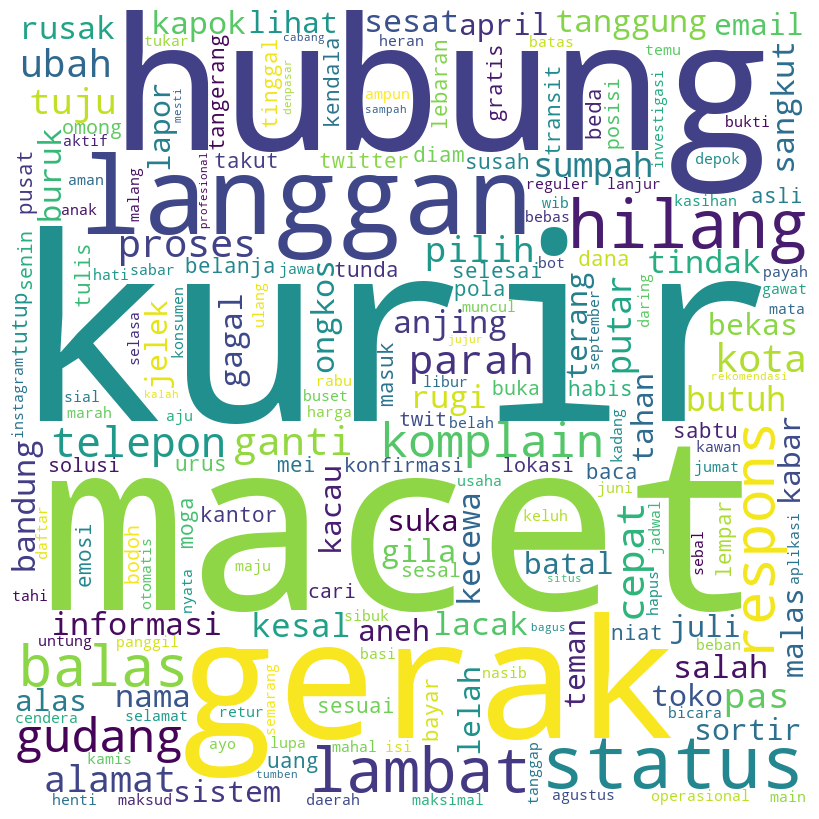

In [235]:
# Negatif

wordcloud_negatif = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words,
                collocations = False,
                min_font_size = 10).generate_from_frequencies(word_frequencies_scaled_negatif)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_negatif) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.savefig('anteraja_wordcloud_negatif.png', dpi=300)
plt.show()

In [236]:
word_frequencies_negatif_ct = df_negatif['clean_tweets_wc'].str.split().explode().value_counts()

In [237]:
df_word_count_negatif = pd.DataFrame({'kata': word_frequencies_negatif_ct.index, 'jumlah kata': word_frequencies_negatif_ct.values})

df_word_count_negatif

,kata,jumlah kata
0,kurir,6388
1,macet,5629
2,hubung,4724
3,gerak,3915
4,langgan,3718
...,...,...
3916,geleng,1
3917,surung,1
3918,buntu,1
3919,baterai,1


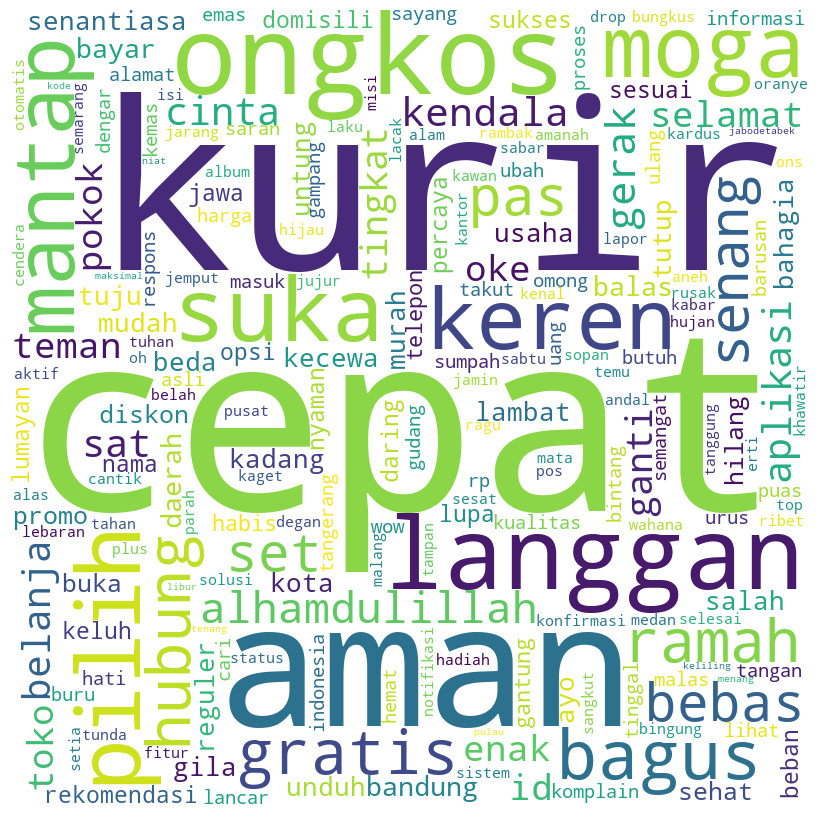

In [238]:
# Positif

wordcloud_positif = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words,
                collocations = False,
                min_font_size = 10).generate_from_frequencies(word_frequencies_scaled_positif)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_positif) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.savefig('anteraja_wordcloud_positif.png', dpi=300)
plt.show()

In [239]:
word_frequencies_positif_ct = df_positif['clean_tweets_wc'].str.split().explode().value_counts()

In [240]:
df_word_count_positif = pd.DataFrame({'kata': word_frequencies_positif_ct.index, 'jumlah kata': word_frequencies_positif_ct.values})

df_word_count_positif

,kata,jumlah kata
0,cepat,2103
1,kurir,1771
2,aman,848
3,ongkos,803
4,langgan,652
...,...,...
2534,ingkar,1
2535,halilintar,1
2536,teduh,1
2537,res,1
